   Unnamed: 0.1  Unnamed: 0 Company Name    Location  \
0             0           0       SpaceX         USA   
1             1           1         CASC       China   
3             3           3    Roscosmos  Kazakhstan   
4             4           4          ULA         USA   
5             5           5         CASC       China   

                        Datum  \
0  Fri Aug 07, 2020 05:12 UTC   
1  Thu Aug 06, 2020 04:01 UTC   
3  Thu Jul 30, 2020 21:25 UTC   
4  Thu Jul 30, 2020 11:50 UTC   
5  Sat Jul 25, 2020 03:13 UTC   

                                              Detail Status Rocket  Rocket  \
0       Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  StatusActive   50.0    
1                Long March 2D | Gaofen-9 04 & Q-SAT  StatusActive  29.75    
3       Proton-M/Briz-M | Ekspress-80 & Ekspress-103  StatusActive   65.0    
4                         Atlas V 541 | Perseverance  StatusActive  145.0    
5  Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...  StatusActive  64.68 

TypeError: choropleth() got an unexpected keyword argument 'location'

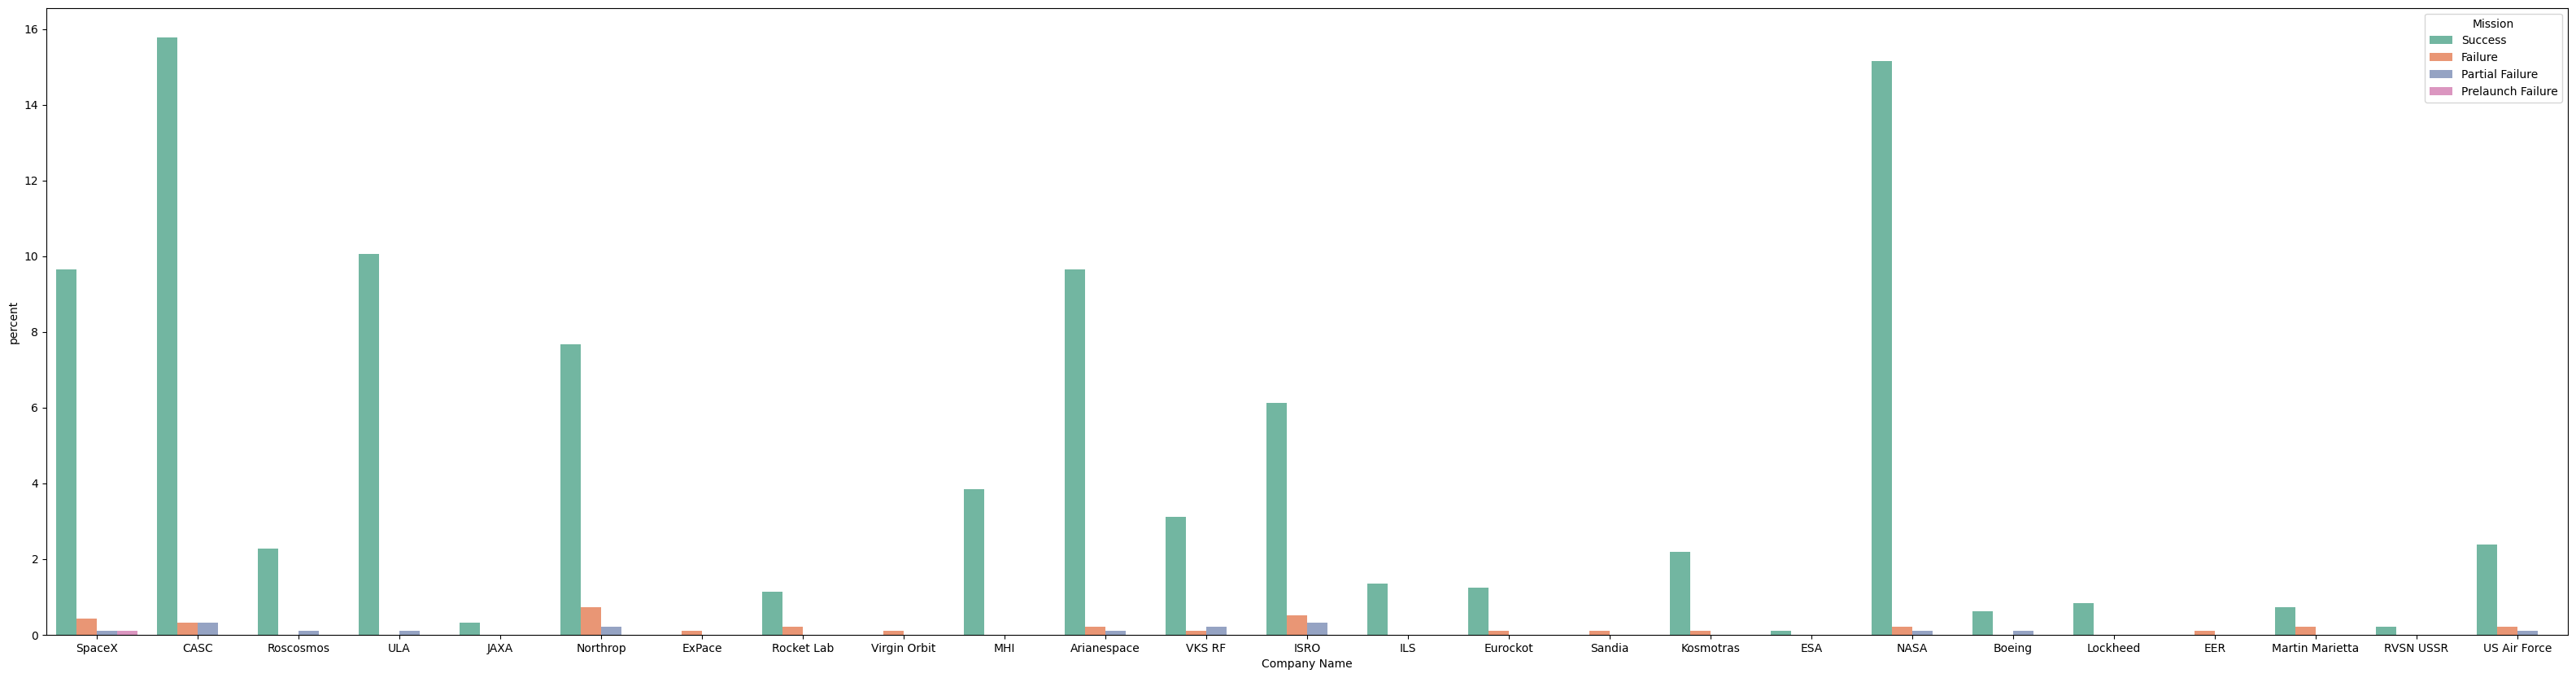

In [2]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen


file = pd.read_csv('Space_race.csv', dtype={'Rocket': int, 'Mission': int})


file.dropna(inplace=True)


file.rename(columns={'Status Mission':'Mission'} , inplace=True)
file.rename(columns={file.columns[7]: 'Rocket'}, inplace=True)

df = pd.DataFrame(file, columns=['Company Name', 'Rocket', 'Mission'])

fig = px.bar(df, x="Company Name", y="Rocket", title="Rockets launched" , color_discrete_sequence=["green"])
fig.show()
#ax = sns.countplot(df , y = 'Mission', palette="Set2")
plt.figure(figsize=(40,10))
ay = sns.countplot(df , x = 'Company Name' , hue='Mission',stat='percent', palette="Set2")

fig2 = px.scatter(df, x="Company Name", y="Mission", title="Missions by Company",
                 labels={"Company Name": "Company Name", "Mission": "Number of Missions"})

fig2.show()

file["Country"] = file['Location'].str.split(',').str[-1].str.strip()
print(file.head())

fig3 = px.choropleth(file, locations='Country', locationmode='country names', 
                     color='Rocket', title='Rocket Launches by Country',
                     color_continuous_scale="Viridis")